Este script mostra como amostrar pontos de um Modelo de Markov Oculto (HMM): é usado um modelo de 4 estados com média e covariância especificadas. O gráfico mostra a sequência de observações geradas com as transições entre elas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm

In [2]:
# Probabilidade inicial de população
startprob = np.array([0.6, 0.3, 0.1, 0.0])

In [3]:
# Matriz de transição
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])


In [4]:
# Parâmetros médios para cada estado
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])

In [5]:
# Parâmetros de covariância para cada estado. A forma depende de covariance_type
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

In [6]:
# Construindo uma instância HMM e definindo parâmetros
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Em vez de ajustá-lo aos dados, é definido diretamente a estimativa, parâmetros, médias e covariâncias dos componentes
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars


In [15]:
# Generando amostras
X, Z = model.sample(50) # X é Matriz de Recursos e Z é sequência de estados produzida pelo modelo.
print(X)
print('--------')
print(Z)

[[ 7.97067411e-01  1.14774502e+01]
 [ 5.67641323e-02  1.07367430e+01]
 [-4.36784193e-01  1.11809654e+01]
 [ 1.47087740e-01 -1.03270434e+00]
 [ 1.23937342e+00  2.65134222e-01]
 [-1.01009901e+00  2.09571956e-01]
 [ 2.06174430e-01 -2.10930071e-01]
 [ 1.05809644e+01 -1.30075582e+00]
 [ 1.09133775e+01 -1.45479450e+00]
 [ 8.99818279e+00  1.06363571e+01]
 [ 9.08363203e+00  9.70954136e+00]
 [ 1.13848442e+01 -1.09839804e+00]
 [ 1.22042583e+01 -1.18865638e+00]
 [ 1.10519565e+01 -9.30933785e-01]
 [ 9.13853155e+00  1.02045232e+01]
 [ 1.03069249e+01  1.01715624e+01]
 [ 8.36334983e+00  9.79198850e+00]
 [ 9.17359882e+00  9.99202317e+00]
 [ 1.15426841e+01 -2.68452792e-01]
 [ 1.01465771e+01 -1.07980246e+00]
 [ 1.21404908e+01 -5.60249878e-01]
 [ 2.25188176e-01  4.18992154e-01]
 [ 9.05304007e-01  4.33519868e-01]
 [-4.89927175e-01  1.08480950e+01]
 [ 7.82304932e-01 -7.95065757e-01]
 [ 1.14435832e+01 -1.04737118e+00]
 [ 1.22565746e+01 -8.72012691e-01]
 [ 1.02822240e+01 -4.43739940e-01]
 [ 1.17187951e+01 -7

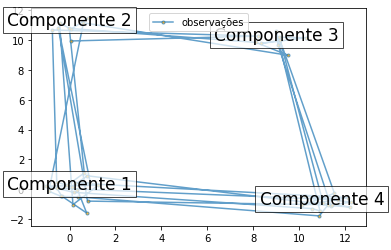

In [16]:
# Plot dos dados de amostra
plt.plot(X[:, 0], X[:, 1], ".-", label="observações", ms=6,mfc="orange", alpha=0.7)

# Indique os números dos componentes
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Componente %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()